<a href="https://colab.research.google.com/github/AwatefAbdun/I_ProjectEDA/blob/main/IP_Awatef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes."

**Defining the Question:**
Can we determine whether an individual has/uses a bank account based on given data?

**Metric for Success:**
Finding a relationship between the variables in relation to having a bank account and the nature of the relationship.
Successfully coming up with a method to predict individuals who are most likely to have or use a bank account based on the data.

**Context Understanding:**
The data contains information from different individuals across four countries: Kenya, Rwanda, Uganda and Tanzania between the years 2016 - 2018, with a total of 23524 entries.
The individuals reported whether they had a bank account or not, and gave responses on other key demographical factors such as age, gender and level of education etc which we will consider as potential factors in the analysis.


**Experimental Design:**
First was the data cleaning; dropping missing values and unnecessary columns plus other data cleaning procedures. Next a univariate analysis on each variable complete with charts and summary was done followed by a bivariate analysis with a focus on each variable against our dependent y variable (whether or not an individual has a bank account) since it is the focus of the question.
For multivariate analysis, multiple regression was done and tested for accuracy. Thereafter PCA/LDA was applied and its performance evaluated, our y variable being whether one has a bank account and the rest remained the x variables.
Conclusion and remarks follow. 




**Data Relevance:**

The data has relevant information that can be used to answer the defined question. 



In [ ]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# uploading, reading and checking data
FDdf = pd.read_csv("/content/Financial Dataset - 1.csv")
FDdf.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
FDdf.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking df info cont.
#
FDdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#checking and changing to appropriate dtypes:
# column dtype seem ok except for year
# column 1: Year
# checking for unique values in the column
FDdf['year'].unique()
# data is from 2016 to 2018, so 2056, 2039 and 2029 are possible data entry errors, 
# 2059, 2039 and 2029 each only appear once confirmed using the following code to check for each 
FDdf[FDdf['year'] == 2056].value_counts().sum()

# column year in this case is a categorical variable hence changing dtype:
FDdf['year'] = FDdf['year'].astype('object')

# rechecking info
FDdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  object 
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.3+ MB


**Data Source Validation:**

Household size mean from dataset = 3.69

checking with other sources; from UN site kenyas is 3.9, Rwanda is 4.3, Uganda is 4.7, Tanzania is 4.9 in 2017. Mean of this mean is 4.45 which is not far from our sample household mean size.

###**CLEANING THE DATASET**

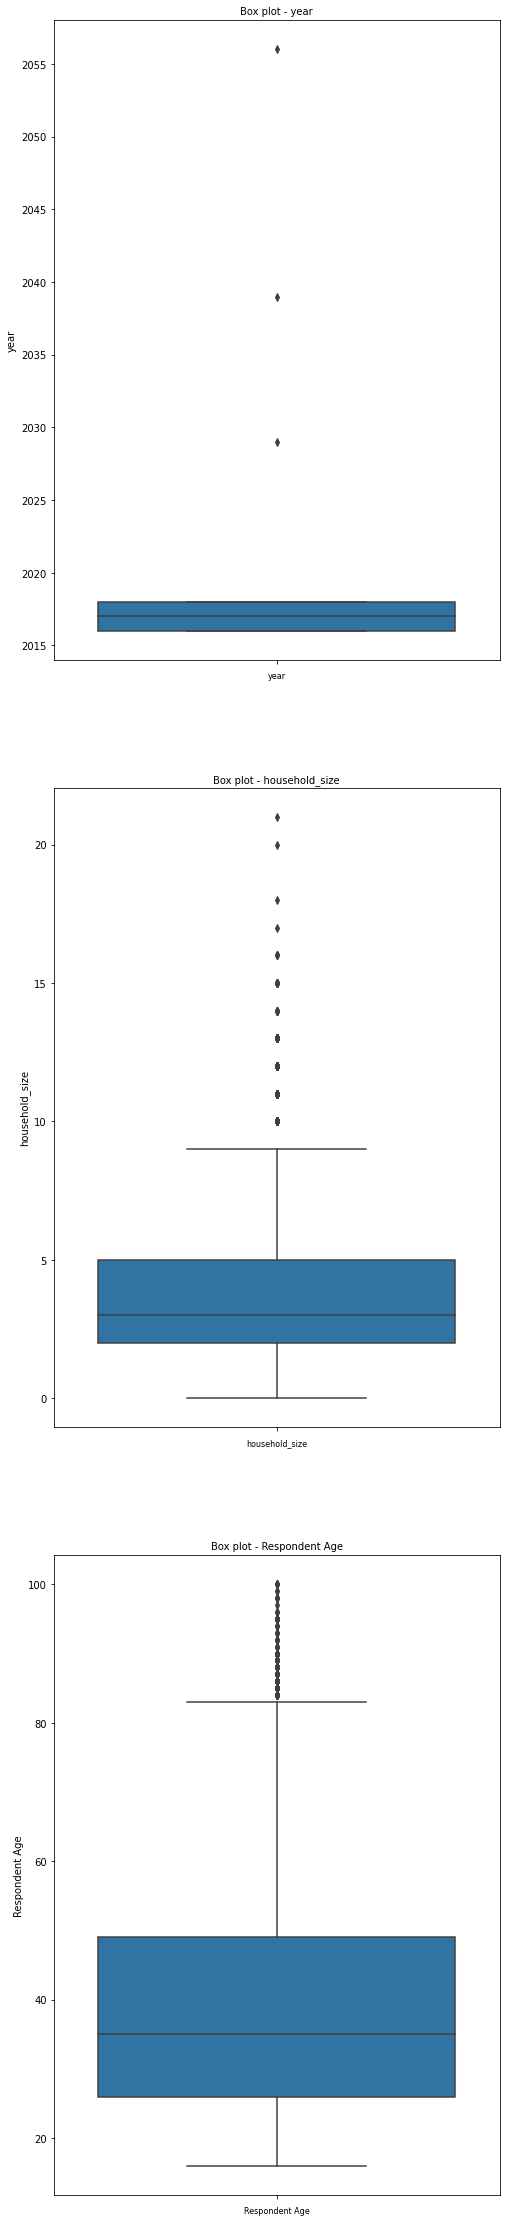

In [ ]:
#checking for outliers
# other than data entry misstypes there are usually no outliers in categorical data
# checking for outliers in the continous data variables + year confirming the three misstypes observed earlier
col_names = ['year','household_size', 'Respondent Age' ]

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    sns.boxplot(y=FDdf[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
#checking how many on the amount of outliers
# no of 90+yr olds
FDdf[FDdf['Respondent Age'] > 85].value_counts().sum()

164

In [ ]:
#
# no of households with a size of 10+
FDdf[FDdf['household_size'] > 10].value_counts().sum()

185

In [ ]:
# removing outliers by first turning them into null values using IQR
# null/missing values to be dealt with next

for x in ['year']:
    q75,q25 = np.percentile(FDdf.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    FDdf.loc[FDdf[x] < min,x] = np.nan
    FDdf.loc[FDdf[x] > max,x] = np.nan

In [ ]:
#checking each categorical variable's unique values
#rerunning code for each column
# all seem ok except level of education 
FDdf['Level of Educuation'].unique()
# theres an extra value 6 doesnt belong to any category
# will drop the row
FDdf.drop(FDdf[FDdf['Level of Educuation'] == "6"].index, inplace = True)


In [ ]:
# Identifying the Missing Data
#
FDdf.isnull().sum()

country                   14
year                       3
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# dealing with missing data
FDdf.dropna(inplace = True)
FDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23313 non-null  object 
 1   year                    23313 non-null  object 
 2   uniqueid                23313 non-null  object 
 3   Has a Bank account      23313 non-null  object 
 4   Type of Location        23313 non-null  object 
 5   Cell Phone Access       23313 non-null  object 
 6   household_size          23313 non-null  float64
 7   Respondent Age          23313 non-null  float64
 8   gender_of_respondent    23313 non-null  object 
 9   The relathip with head  23313 non-null  object 
 10  marital_status          23313 non-null  object 
 11  Level of Educuation     23313 non-null  object 
 12  Type of Job             23313 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [ ]:
# More data cleaning procedures
# checking for duplicates
FDdf.duplicated().sum()

0

In [ ]:
# dropping unnecessary column
FDdf.drop('uniqueid', inplace=True, axis=1)

***Outliers:*** Other than the data entry mistakes for the Year Column, will not be dropping the outliers as while it is rare it is also not very uncommon to come across a large family or a an old family member. The number of 85+yr olds and families larger than 10 is very little compared to the number of respondents, which is also believable. 

***Missing values:*** Dropped all missing values from the dataset since the sum of missing values was small compared to the non null count of 23317 which is still sufficient to run our analysis.

***Duplicates:*** There are no duplicates.

***Other:*** Dropped the unique id variable as it is unnecessary and not a potential factor to be considered.

###**EXPLORATORY ANALYSIS**

In [ ]:
FDdf.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Univariate Analysis pt.1
#frequency tables for categorical columns
catcols = ["country","year","Has a Bank account",'Type of Location', 'Cell Phone Access', 'gender_of_respondent',
        'The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job' ]
for x in catcols:
  xf = pd.crosstab(index=FDdf[x], columns="count") 
  print(xf)



col_0     count
country        
Kenya      6062
Rwanda     8665
Tanzania   6497
Uganda     2089
col_0  count
year        
2016    8665
2017    6497
2018    8151
col_0               count
Has a Bank account       
No                  20022
Yes                  3291
col_0             count
Type of Location       
Rural             14247
Urban              9066
col_0              count
Cell Phone Access       
No                  5998
Yes                17315
col_0                 count
gender_of_respondent       
Female                13748
Male                   9565
col_0                   count
The relathip with head       
Child                    2221
Head of Household       12714
Other non-relatives       189
Other relative            661
Parent                   1069
Spouse                   6459
col_0                    count
marital_status                
Divorced/Seperated        2047
Dont know                    8
Married/Living together  10682
Single/Never Married      7899
W

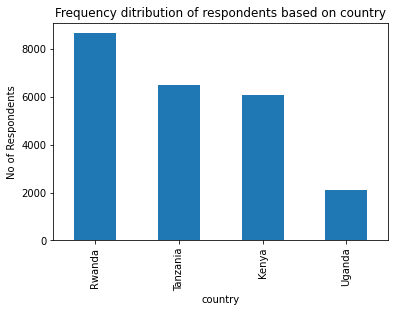

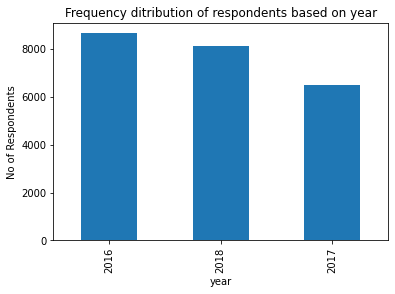

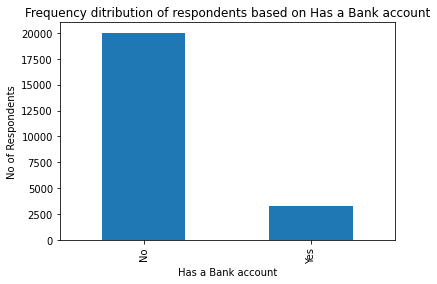

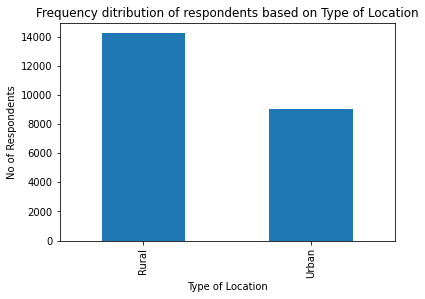

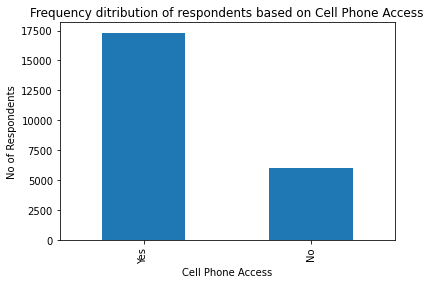

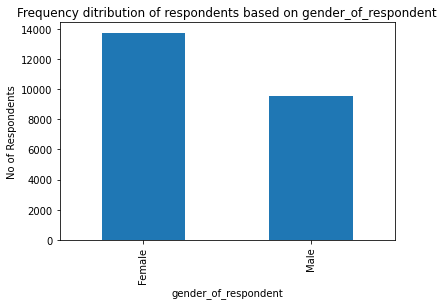

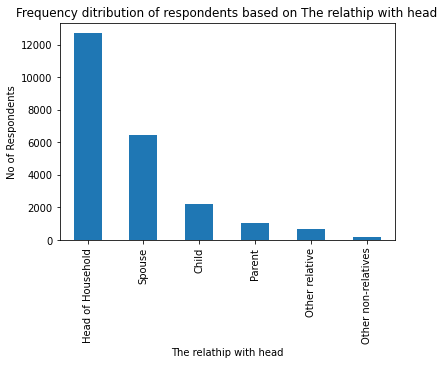

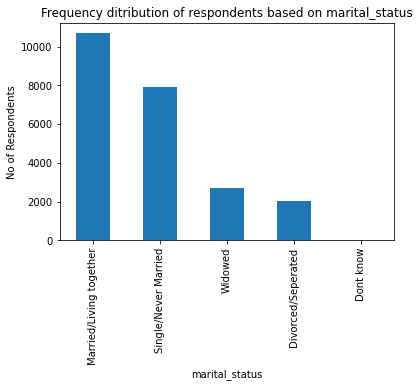

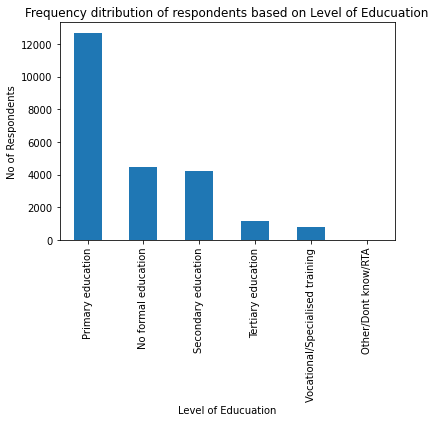

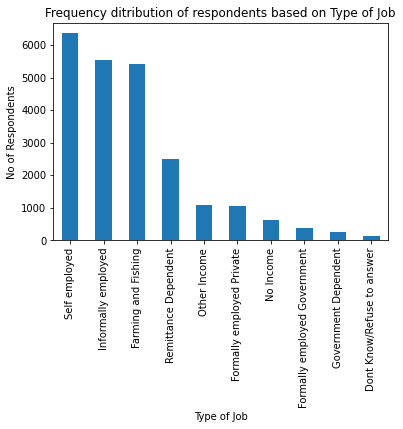

In [ ]:
# Univariate Analysis cont.
#plotting bar charts for all categorical variables
#

for x in catcols:
  FDdfx_count = FDdf[x].value_counts()
  FDdfx_count.plot.bar()
  plt.title("Frequency ditribution of respondents based on "+ x )
  plt.xlabel(x)
  plt.ylabel("No of Respondents")
  plt.show()


***Bar Chart Summary:***

*Country:* Rwanda has the highest number of respondents in our dataset while Uganda has the least.

*Year:* Highest number of respndents are from the year 2016, followed by 2018 and lastly 2017.

*Bank Account Access:* Most of the respondents do not have a bank account.

*Location:* More respondents are located in Rural area compared to those in urban areas, this is could be dy design as in reality as there are more people spread out in rural areas in total than in urban areas.

*Cell Phone Access:* More respondents have cell phone access compared to those who dont.

*Gender:* More females than male respondents in the dataset, which is appropriately represent actual demographics.

*Relationship with the head:* Most are the head of the household followed by spouse then child. others are parent, other relative then the least which is non- relative.

*Marital Status:* Highest number of respondents are living together/married followed by single/never married which are the bulk of responses, rest are widowed followed by divorced/separated.

*Level of Education:* more respondents have had primary education, followed by those who had no formal education, secondary education, tertiary education and alstly vocational/specialised training.

*Type of Job:* The bulk of the respondents are self employed, informally employed and farming & fishing respectively.

In [ ]:
# univariate analysis pt. 2
# summary statistics for rest of the data (continous data column )
FDdf.describe()

,household_size,Respondent Age
count,23313.000000,23313.000000
mean,3.688414,38.793549
std,2.280842,16.510611
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


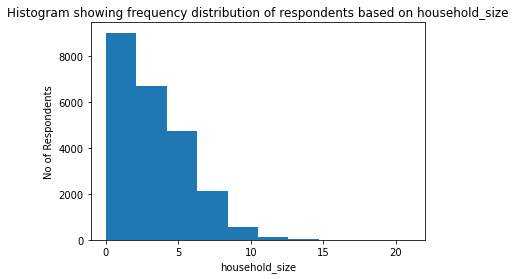

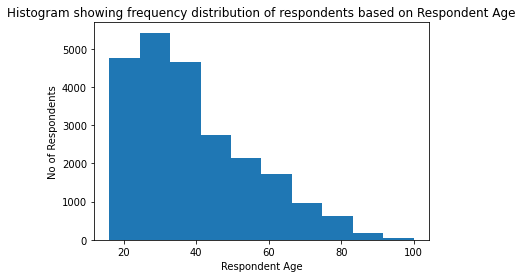

In [ ]:
# univariate analysis cont.
# plotting histograms for continous data variables:
cols = ['household_size','Respondent Age']
for c in cols:
  FDdf[c].plot.hist()
  plt.title("Histogram showing frequency distribution of respondents based on " + c)
  plt.xlabel(c)
  plt.ylabel("No of Respondents")
  plt.show()


In [ ]:
#checking for skewness and kurtosis for both variables
print(FDdf['household_size'].skew())
print(FDdf['household_size'].kurt())

print(FDdf['Respondent Age'].skew())
print(FDdf['Respondent Age'].kurt())

0.9737983207814955
1.1530073057375057
0.8412764239448531
0.10122691422605756


***Histogram Plot and other summary:*** 

*Respondent Age:*
skewness value of 0.84, (skewness > 0) means theres more weight on the left tail of the distribution.
kurtosis value of 0.10, (kurtosis < 3) means its playkurtic i.e. fewer extreme events than a normal distribution/thinner  on the curve.

We have a mean of 38.79 and standard deviation of 16.51, hence values are a bit more spread out. Highest age is 100, and since outliers were left in this could have affected the standard deviation (and the mean). 
The histogram is skewed to the left, and we can see that the majority of respondents ages is between 16 - 40

*Household Size:*
skewness value of 0.97, (skewness > 0) means theres more weight on the left tail of the distribution.
kurtosis value of 1.15, (kurtosis < 3) means its playkurtic i.e. fewer extreme events than a normal distribution/ curve has thinner tails.

We have a mean of 3.69 and standard deviation of 2.29 which is relatively low hence we can say most values are clustered around the mean.
The histogram is skewed to the left with the majority of respondents having household sizes between 0 - 4

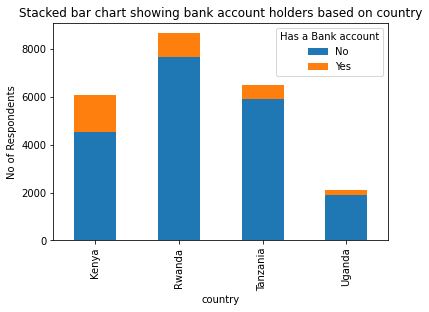

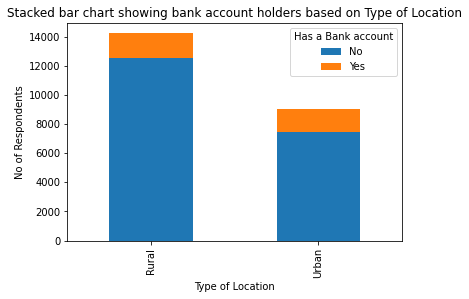

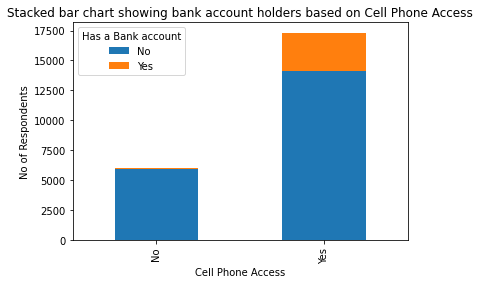

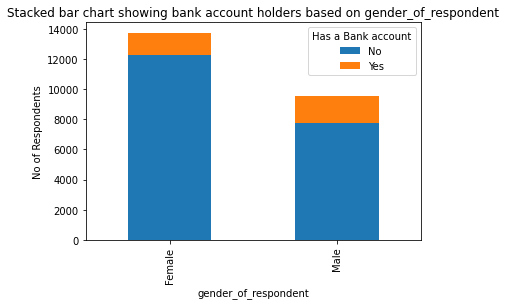

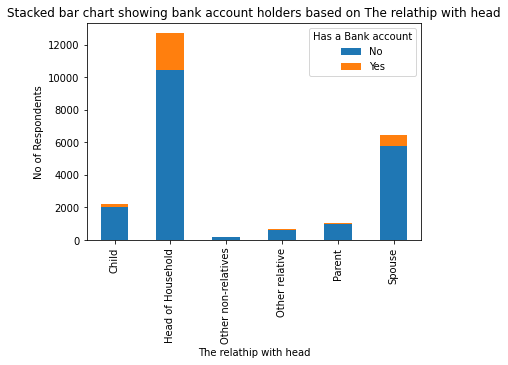

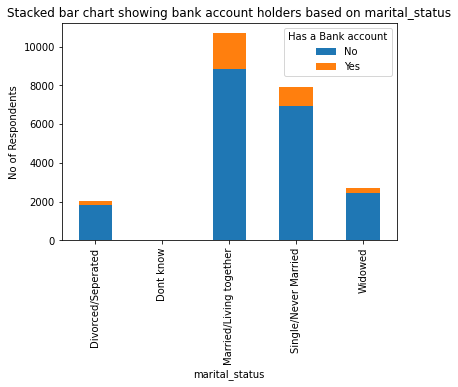

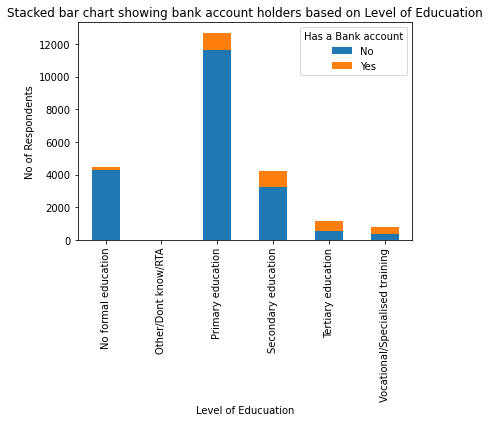

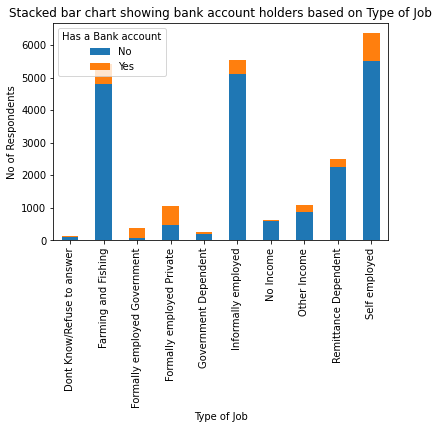

In [ ]:
#Bivariate analysis:
# looking at two variables at a time in line with our reserach question
# first, stacked bar charts of respondents with or without bank accounts vs different potential factors:
Pot_factors = ['country','Type of Location', 'Cell Phone Access', 'gender_of_respondent',
            'The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job']

for pf in Pot_factors:
  pd.crosstab(FDdf[pf], FDdf['Has a Bank account']).plot(kind='bar', stacked=True)
  plt.title("Stacked bar chart showing bank account holders based on " + pf)
  plt.ylabel("No of Respondents")
  plt.show()

***Stacked bar charts Summary:***

Kenya has a larger proportion of respondents with bank accounts overall and uaganda the least based on the data.

Greater proportion of rural respondents have no bank accounts compared to the ones in urban areas, this could be due to less access to banks in the rural areas i.e rural areas have less banks

Almost all respondents with no cell phone access subsequently have no bank accounts compared to those with.

Proportion wise, the females in the dataset less have bank accounts compared to the males.

More Heads of the households have bank accounts compared to the rest, this could be due to most household heads being breadwinners with some form of income and hence requiring some bank services.

Respondents with some form of education have bank accounts compared to the ones with none. the proportion seems to increase with level of education. i.e total respondents with a primary education have a small proportion of bank accounts holders compared those with a tertiary education. 

Those with no income almost all have no bank accounts compared to those with some form income, this can be due to the fact that they no income to store in a bank in the first place.


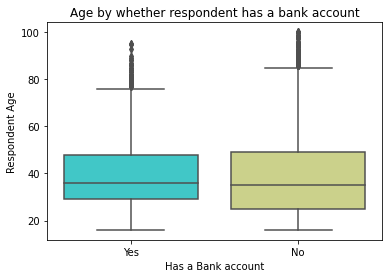

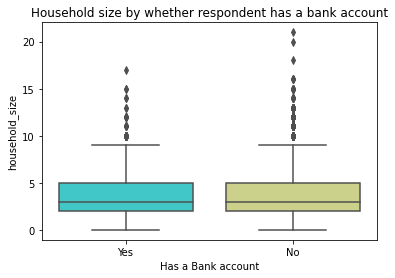

In [ ]:
#boxplots of respondents with or without bank accounts vs different potential factors:

sns.boxplot(x='Has a Bank account',y='Respondent Age',data=FDdf, palette='rainbow')
plt.title("Age by whether respondent has a bank account")
plt.show()

sns.boxplot(x='Has a Bank account',y='household_size',data=FDdf, palette='rainbow')
plt.title("Household size by whether respondent has a bank account")
plt.show()

***boxplots charts summary:***

No much difference on whether one has a bank account or not depending on household sizes.

Respondents without bank accounts have a wider range agewise, with more older respondents included compared to those with bank accounts.

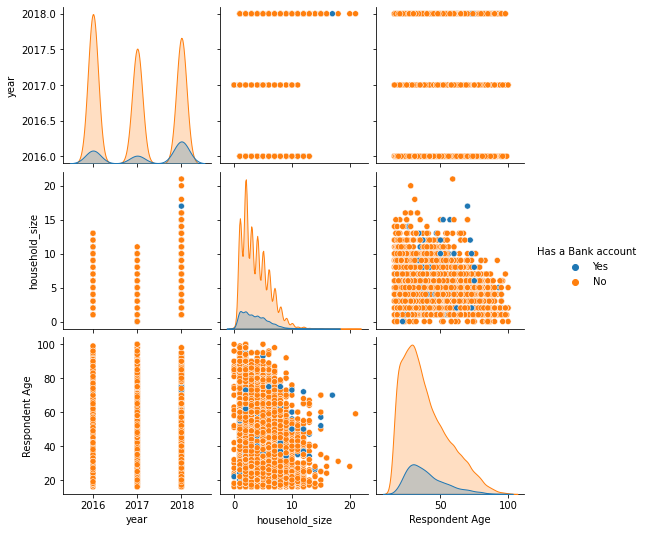

In [ ]:
# other bivariate cont.
sns.pairplot(FDdf, hue='Has a Bank account')

<AxesSubplot:>

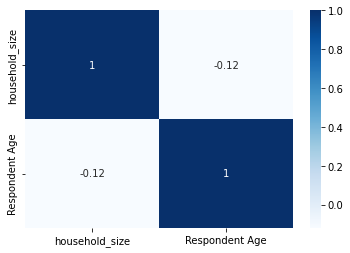

In [ ]:
# correlation matrix
corr = FDdf.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
# For further analysis
# first encoding and assigning data types
bankacc_enc= {'Has a Bank account':{'No': 0, 'Yes':1}}
FDdf.replace(bankacc_enc, inplace=True)


In [ ]:
# as an attempt to reduce number of overall dummy variables:
# will put farming and fishing together with informally employed
FDdf['Type of Job']=np.where(FDdf['Type of Job'] =='Farming and Fishing', 
                             'Informally employed', FDdf['Type of Job'])


In [ ]:
# assignong dummy variables to our x categorical variables
FDdf1 = FDdf.drop('Has a Bank account',axis=1)
FDdf1 = pd.get_dummies(data=FDdf1, columns = ['year','country', 'Type of Location',
                                             'Cell Phone Access',
                                           'gender_of_respondent',
                                           'The relathip with head',
                                           'marital_status',
                                           'Level of Educuation',
                                           'Type of Job'  ])
FDdf1.columns


Index(['household_size', 'Respondent Age', 'year_2016', 'year_2017',
       'year_2018', 'country_Kenya', 'country_Rwanda', 'country_Tanzania',
       'country_Uganda', 'Type of Location_Rural', 'Type of Location_Urban',
       'Cell Phone Access_No', 'Cell Phone Access_Yes',
       'gender_of_respondent_Female', 'gender_of_respondent_Male',
       'The relathip with head_Child',
       'The relathip with head_Head of Household',
       'The relathip with head_Other non-relatives',
       'The relathip with head_Other relative',
       'The relathip with head_Parent', 'The relathip with head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'Level of Educuation_No formal education',
       'Level of Educuation_Other/Dont know/RTA',
       'Level of Educuation_Primary education',
       'Level of Educuation_Secondary education',
 

In [ ]:
# columns number has increased to 41!
FDdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   household_size                                       23313 non-null  float64
 1   Respondent Age                                       23313 non-null  float64
 2   year_2016                                            23313 non-null  uint8  
 3   year_2017                                            23313 non-null  uint8  
 4   year_2018                                            23313 non-null  uint8  
 5   country_Kenya                                        23313 non-null  uint8  
 6   country_Rwanda                                       23313 non-null  uint8  
 7   country_Tanzania                                     23313 non-null  uint8  
 8   country_Uganda                                       23313 non-nul

In [ ]:
#dividing data into training and test sets
#
X = FDdf1
y = FDdf['Has a Bank account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# performing feature scaling / Normalisation
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# note: rerun previous and current cell before each analysis / model below

***LOGISTIC REGRESSION***

In [ ]:
# since our dependent variable y in this case is a binary categorical variable we will use
# binary / logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


In [ ]:
# checking for accuracy of data
#
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8848380870684109


In [ ]:
# checking coefficients 
logreg.coef_

array([[-0.01581101,  0.23248133,  0.07253353, -0.13350322,  0.05208164,
         0.2287847 ,  0.07253353, -0.13350322, -0.26157545, -0.06474013,
         0.06474013, -0.39386918,  0.39386918, -0.09478695,  0.09478695,
        -0.15137991,  0.11016615, -0.04683218, -0.06139802, -0.09466968,
         0.0532653 , -0.0226001 , -0.00748205,  0.0606335 , -0.05069736,
         0.00102126, -0.42246597,  0.04148339, -0.17150004,  0.25458748,
         0.43911227,  0.31167576,  0.0046559 ,  0.17967137,  0.28294686,
         0.11872799, -0.21506037, -0.1285238 ,  0.10861388, -0.13495954,
         0.1179686 ]])

Logistic regression model has an accuracy of 88.48%
We can say that we are able to determine whether one has a bank account or not using our independent variables.
The coefficients value represent how much the dependent variable is going to change(increase/decrease depending on the sign) when the independent variable is increased by one unit, all other independent variables held constant.
The sign of a regression coefficient also show whether there is a positive or negative correlation between each independent variable and the dependent variable.

However it makes more sense to apply a reduction technique as our data has two many variables, especially after introducing dummy variables in our dataset.

***PRINCIPAL COMPONENT ANALYSIS***

In [ ]:
#applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.27076439e-01, 8.13673713e-02, 7.23953346e-02, 6.70404115e-02,
       5.25859880e-02, 4.63822406e-02, 4.06663489e-02, 3.63667325e-02,
       3.47433467e-02, 3.03309863e-02, 2.91829268e-02, 2.67896508e-02,
       2.56055878e-02, 2.52257105e-02, 2.47572854e-02, 2.45749648e-02,
       2.43259472e-02, 2.41410534e-02, 2.39142304e-02, 2.33187319e-02,
       2.26136770e-02, 2.20589876e-02, 2.06337519e-02, 1.93748809e-02,
       1.56652843e-02, 1.46443593e-02, 1.26253587e-02, 1.15878695e-02,
       1.11133343e-02, 8.89120834e-03, 7.83180820e-32, 9.83814437e-33,
       4.95584227e-33, 4.65915267e-33, 2.98518663e-33, 2.01943753e-33,
       1.93192304e-33, 1.73186606e-33, 1.11201683e-33, 2.68601410e-34,
       1.38471326e-34])

The explained variance ratio is the percentage of variance that is attributed by each of the selected components.


In [ ]:
# first using 1 Principal Component
# 
from sklearn.decomposition import PCA

pca = PCA(1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# using random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:' , accuracy_score(y_test, y_pred))


[[4009    0]
 [ 654    0]]
Accuracy: 0.8597469440274501


From the results we can say our PCA model has an accuracy score of 85.97% with only 1 principal component.
The random forest algorithm is able to correctly predict 4009 out of 4663 instances. 

Rerunning the above cells while increasing the number of principal components to check if accuracy increases:

The accuracy increases to 87.30% with 2 p.components. The random forest algorithm is able to correctly predict 4,071 out of 4663 instances.
The accuracy reduces to 86.51% with 3 p.components compared to two. The random forest algorithm is able to correctly predict 4,034 out of 4663 instances.

Other calculated accuracies:
4 pc = 87.13% , 5 pc = 86.42%

The accuracy reduces to 86.45% with a full feature set / components, hence we can predict most accurately with just 2 principal components at 87.30% 

***LINEAR DISCRIMINANT ANALYSIS***

In [ ]:
#performing LDA to compare

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#setting the n_components to 1, because first checking the performance 
#of our classifier with a single linear discriminant.

In [ ]:
# Training and Making Predictions
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 88.63%, 

[[3965   44]
 [ 486  168]]
Accuracy: 0.886339266566588


The random forest algorithm is able to correctly predict 4,133 out of 4,663 instances.
The algorithm has a high accuracy of 88.63% with just one component, which is higher than the accuracy achieved with one principal component while using PCA. 
It is also close to the accuracy we got from the regression model of 88.48%, though slightly higher 88.63%.

We can conclude that the model can sufficiently predict whether an individual has a bank account or not based on our independent variables from the given data.


**Challenging your Solution:**

In [ ]:
##dividing data into different training and test sets
#
X1 = FDdf1
y1 = FDdf['Has a Bank account']
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [ ]:
# performing feature scaling / Normalisation
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [ ]:
# performing LDA with the new sets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X1_train = lda.fit_transform(X1_train, y1_train)
X1_test = lda.transform(X1_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X1_train, y1_train)
y1_pred = classifier.predict(X1_test)

In [ ]:
# Evaluating the Performance 
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y1_test, y1_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 88.86%!! using
# another random set of data. 

[[3950   47]
 [ 472  194]]
Accuracy: 0.8886982629208664


Using a different set of train and test set to check performance gave us an accuracy of 88.86%, The algorithm can consistently sufficiently predict y.

**Follow up questions:**

*Did we have the right data?*


The data was sufficient and appropriate for the analysis; we can confidently answer our research question on whether we can predict if one has/uses a bank account based on given demographic factors. We can see that even other models give high accuracy scores based on the given data as well.

*Do we need other data to answer our question?*

No need for other data to answer our question however:

It would be great if we can get data from the same year across all countries, as the ratio of bank account owners might have significantly changed within two years, i.e the data from 2016 for Rwanda, 2017 for Tanzania against 2018 data of Kenya and Uganda.
It would also be better if we can data with larger proportions of sample with respect to the respective countries' population for better representation of the data. In our case rwanda had the highest number of respondents at 8,665 compared to uganda with least at 2,086 , while in reality uganda has a population of about 3.5x more that of Rwanda.

*Did we have the right question?*

Yes considering the research problem was to check for bank account holders/users.

However it is worth mentioning that testing for financial inclusion goes beyond banks especially with the success of mobile money services.
The number of respondents without bank accounts is 20,022, compared to the numbers of respondents with cell phones (access to mobile money by extension) which is 17,315 all out of 23,313. In this case we could have had our question reflect this by checking for all with access to financial services and not necessarily from banks, although this would require for more data and our dataset may not be sufficient for it.

